In [70]:
import pickle
%matplotlib inline
import matplotlib.pyplot as plt


In [12]:
df = pickle.load( open( "2015-12-11-mlpexperiments_results2.p", "rb" ) )
df.shape

(90, 20)

In [13]:
df.head()

,cm_overall,epochs,network,pct_white,test_size,training_size,p_cm,P_cm,r_cm,R_cm,n_cm,N_cm,b_cm,B_cm,q_cm,Q_cm,k_cm,K_cm,white_cm,black_cm
1,"[[3232, 3239], [1710, 1819]]",3,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5058,10000,1000,"[[397, 152], [423, 201]]","[[441, 169], [486, 179]]","[[244, 188], [244, 196]]","[[252, 227], [284, 222]]","[[222, 91], [217, 84]]","[[283, 88], [234, 98]]","[[192, 106], [202, 102]]","[[293, 130], [285, 135]]","[[249, 115], [219, 110]]","[[296, 139], [278, 173]]","[[153, 156], [159, 155]]","[[210, 149], [208, 164]]","[[1775, 902], [1775, 971]]","[[1457, 808], [1464, 848]]"
1,"[[2338, 2221], [2604, 2837]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5058,10000,1000,"[[246, 303], [238, 386]]","[[324, 286], [309, 356]]","[[193, 239], [195, 245]]","[[202, 277], [213, 293]]","[[151, 162], [148, 153]]","[[201, 170], [155, 177]]","[[125, 173], [139, 165]]","[[218, 205], [196, 224]]","[[173, 191], [152, 177]]","[[221, 214], [205, 246]]","[[114, 195], [106, 208]]","[[170, 189], [165, 207]]","[[1336, 1341], [1243, 1503]]","[[1002, 1263], [978, 1334]]"
1,"[[2669, 2572], [2273, 2486]]",7,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5058,10000,1000,"[[426, 123], [443, 181]]","[[262, 348], [194, 471]]","[[248, 184], [269, 171]]","[[197, 282], [208, 298]]","[[240, 73], [244, 57]]","[[152, 219], [125, 207]]","[[205, 93], [221, 83]]","[[176, 247], [158, 262]]","[[257, 107], [226, 103]]","[[174, 261], [173, 278]]","[[164, 145], [157, 157]]","[[168, 191], [154, 218]]","[[1129, 1548], [1012, 1734]]","[[1540, 725], [1560, 752]]"
1,"[[2839, 2126], [2103, 2932]]",3,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5058,10000,10000,"[[424, 125], [360, 264]]","[[287, 323], [123, 542]]","[[252, 180], [224, 216]]","[[252, 227], [209, 297]]","[[247, 66], [217, 84]]","[[145, 226], [82, 250]]","[[205, 93], [178, 126]]","[[193, 230], [132, 288]]","[[244, 120], [164, 165]]","[[232, 203], [151, 300]]","[[173, 136], [129, 185]]","[[185, 174], [157, 215]]","[[1294, 1383], [854, 1892]]","[[1545, 720], [1272, 1040]]"
1,"[[3799, 3104], [1143, 1954]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5058,10000,10000,"[[342, 207], [135, 489]]","[[561, 49], [547, 118]]","[[278, 154], [229, 211]]","[[394, 85], [389, 117]]","[[208, 105], [136, 165]]","[[341, 30], [279, 53]]","[[180, 118], [128, 176]]","[[390, 33], [378, 42]]","[[235, 129], [132, 197]]","[[415, 20], [370, 81]]","[[175, 134], [116, 198]]","[[280, 79], [265, 107]]","[[2381, 296], [2228, 518]]","[[1418, 847], [876, 1436]]"


In [14]:
#methods to decode serialized network json
import json

def get_num_layers(json_str):
    # number of actual layers - 5 for input and output / 3 for each hidden + 2 for input and output
    return (len(json.loads(json_str)['layers']) - 5) / 3 + 2

def get_first_activation(json_str):
    return json.loads(json_str)['layers'][1]['activation']

def get_first_width(json_str):
    return json.loads(json_str)['layers'][0]['output_dim']

In [15]:
json_str = df.iloc[-1,2]

In [33]:
df['training_size'].max()

584268

In [16]:
df['network'].apply(get_first_width)

1      64
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1     128
1     128
1     128
1     128
1     128
1     128
1     128
1     128
1     128
1     128
1     128
1     128
1     256
1     256
1     256
1     256
1     256
1     256
     ... 
1    2048
1    2048
1    2048
1    2048
1    2048
1    2048
1    2048
1    2048
1    2048
1    2048
1    2048
1    2048
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1      64
1     128
1     128
1     128
1     128
1     128
1     128
Name: network, dtype: int64

In [17]:
#convert confusion matrices to accuracy
def cm2accuracy(cm):
    return (cm[0][0] + cm[1][1] * 1.0) / sum([sum(a) for a in cm])
    
df['overall_acc'] = df['cm_overall'].apply(cm2accuracy)
df['width'] = df['network'].apply(get_first_width)
df['num_layers'] = df['network'].apply(get_num_layers)

In [42]:
pieces = df[df['training_size'] == 584268].iloc[:,6:-4].applymap(cm2accuracy).head(1).iloc[0,:]

In [51]:
black = [a for a in pieces.index if a.islower()]
white = [a for a in pieces.index if not a.islower()]
black_pieces = pieces[black[:-1]]
white_pieces = pieces[white]

In [60]:
black_pieces.index

Index([u'p_cm', u'r_cm', u'n_cm', u'b_cm', u'q_cm', u'k_cm'], dtype='object')

[None, None, None, None, None, None]

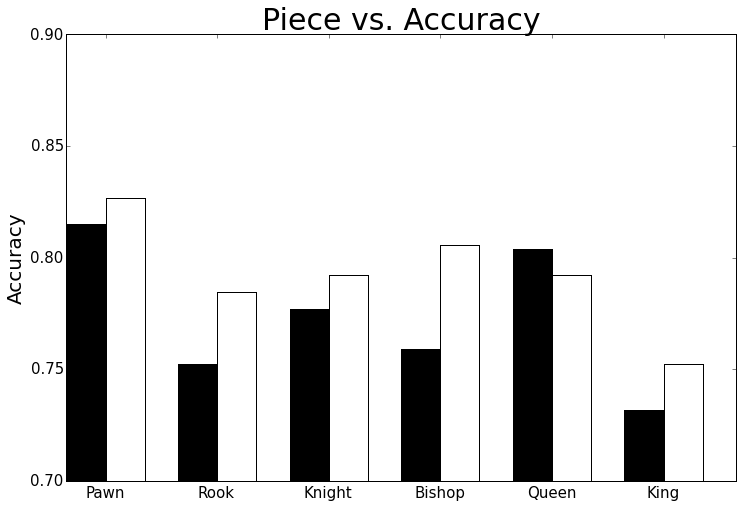

In [88]:
ind = range(6)
offset_ind = [i + width for i in ind]
width = 0.35
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(ind, black_pieces, width, color='black')
ax.bar(offset_ind, white_pieces, width, color='white')
plt.ylim((.7,.9))
ax.set_xticks(offset_ind)
ax.set_xticklabels(['Pawn', 'Rook', "Knight", "Bishop", "Queen", "King"])
ax.set_ylabel("Accuracy", fontsize=20)
ax.set_title("Piece vs. Accuracy", fontsize=30)
plt.setp(ax.get_xticklabels(), fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=15)

In [64]:
d = pickle.load( open( "piece_count.p", "rb" ) )
d

{'B': 0.07865,
 'K': 0.07048,
 'N': 0.07647,
 'P': 0.12417,
 'Q': 0.08711,
 'R': 0.10007,
 'b': 0.06076,
 'k': 0.06224,
 'n': 0.06204,
 'p': 0.11823,
 'q': 0.07171,
 'r': 0.08807}

[None, None, None, None, None, None, None, None, None]

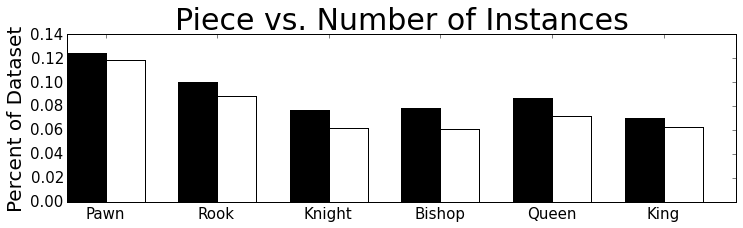

In [87]:
white_piece_count = [d[p] for p in 'prnbqk']
black_piece_count = [d[p] for p in 'PRNBQK']
ind = range(6)
offset_ind = [i + width for i in ind]
width = 0.35
fig, ax = plt.subplots(figsize=(12,3))
ax.bar(ind, black_piece_count, width, color='black')
ax.bar(offset_ind, white_piece_count, width, color='white')
ax.set_xticks(offset_ind)
ax.set_xticklabels(['Pawn', 'Rook', "Knight", "Bishop", "Queen", "King"])
ax.set_ylabel("Percent of Dataset", fontsize=20)
ax.set_title("Piece vs. Number of Instances", fontsize=30)
plt.setp(ax.get_xticklabels(), fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=15)

(0.0, 1.0)

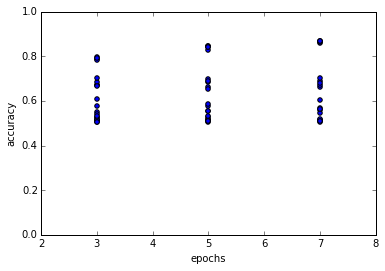

In [71]:
x = df['epochs']
y = df['overall_acc']
plt.scatter(x,y)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim((0.0,1.0))

(0.0, 1.0)

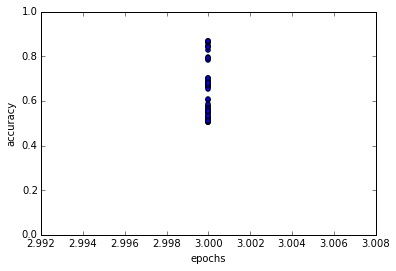

In [72]:
x = df['num_layers']
y = df['overall_acc']
plt.scatter(x,y)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim((0.0,1.0))